In [2]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import sqlite3
import numpy as np
from numpy import random
from functools import reduce

# testing goals scored per match in different leagues

In [3]:
conn = sqlite3.connect('database.sqlite')
c = conn.cursor()

In [4]:
c.execute('''SELECT * FROM League ''')

league = pd.DataFrame(c.fetchall())
league.columns = [i[0] for i in c.description]

In [5]:
c.execute('''
            SELECT 
                   m.id,
                   l.name as league,
                   l.id as league_id,
                   m.season,
                   m.date,
                   m.match_api_id,
                   m.home_team_api_id,
                   m.away_team_api_id,
                   m.home_team_goal,
                   m.away_team_goal
            FROM Match m
            LEFT JOIN League l ON (m.league_id = l.id)
                                   
            ;''')

match_league = pd.DataFrame(c.fetchall())
match_league.columns = [i[0] for i in c.description]

In [6]:
#get relevant leagues
match_league_v2 = match_league.query('league_id == 1 | league_id == 13274 | league_id == 15722 \
                                  | league_id == 17642 | league_id == 19694 | league_id == 24558')

In [7]:
match_league_v2 = match_league_v2[['id', 'league', 'season', 'date', 'home_team_goal', 'away_team_goal']]

In [8]:
match_league_v2['total_goals'] = match_league_v2['home_team_goal'] + match_league_v2['away_team_goal']

In [9]:
#preview summary statistics by league and by season
#match_league_v2.groupby(['league', 'season']).describe()['total_goals']

#dropping belgium league season 2013/2014 due to lack of data
match_league_v2 = match_league_v2.loc[~((match_league_v2['league'] == 'Belgium Jupiler League') & 
                     (match_league_v2['season']=='2013/2014'))]

#preview summary stats by league, note Dutch league has highest mean goals scored per match
match_league_v2.groupby(['league']).describe()['total_goals']

,count,mean,std,min,25%,50%,75%,max
league,,,,,,,,
Belgium Jupiler League,1716.0,2.803613,1.654892,0.0,2.0,3.0,4.0,9.0
Netherlands Eredivisie,2448.0,3.080882,1.740640,0.0,2.0,3.0,4.0,10.0
Poland Ekstraklasa,1920.0,2.425000,1.540355,0.0,1.0,2.0,3.0,8.0
Portugal Liga ZON Sagres,2052.0,2.534600,1.637348,0.0,1.0,2.0,4.0,9.0
Scotland Premier League,1824.0,2.633772,1.644379,0.0,1.0,2.0,4.0,12.0
Switzerland Super League,1422.0,2.929677,1.717765,0.0,2.0,3.0,4.0,9.0


In [10]:
match_league_v2.groupby(['league', 'season']).describe()['total_goals']

count      mean       std  min   25%  50%  \
league                   season                                                 
Belgium Jupiler League   2008/2009  306.0  2.794118  1.599210  0.0  2.00  3.0   
                         2009/2010  210.0  2.690476  1.468784  0.0  2.00  2.0   
                         2010/2011  240.0  2.645833  1.657866  0.0  1.00  2.0   
                         2011/2012  240.0  2.879167  1.803641  0.0  2.00  3.0   
                         2012/2013  240.0  2.929167  1.733012  0.0  2.00  3.0   
                         2014/2015  240.0  2.783333  1.704944  0.0  2.00  3.0   
                         2015/2016  240.0  2.891667  1.588641  0.0  2.00  3.0   
Netherlands Eredivisie   2008/2009  306.0  2.843137  1.742874  0.0  2.00  3.0   
                         2009/2010  306.0  2.915033  1.755358  0.0  2.00  3.0   
                         2010/2011  306.0  3.225490  1.856704  0.0  2.00  3.0   
                         2011/2012  306.0  3.258170  1.770991  0.0  2.00  3.0   
                         2012/2013  306.0  3.150327  1.762157  0.0  2.00  3.0   
                         2013/2014  306.0  3.196078  1.619791  0.0  2.00  3.0   
                         2014/2015  306.0  3.078431  1.738774  0.0  2.00  3.0   
                         2015/2016  306.0  2.980392  1.639554  0.0  2.00  3.0   
Poland Ekstraklasa       2008/2009  240.0  2.183333  1.405210  0.0  1.00  2.0   
                         2009/2010  240.0  2.216667  1.487371  0.0  1.00  2.0   
                         2010/2011  240.0  2.408333  1.610612  0.0  1.00  2.0   
                         2011/2012  240.0  2.195833  1.443201  0.0  1.00  2.0   
                         2012/2013  240.0  2.491667  1.414189  0.0  1.75  2.0   
                         2013/2014  240.0  2.641667  1.645564  0.0  1.75  2.0   
                         2014/2015  240.0  2.616667  1.553419  0.0  2.00  3.0   
                         2015/2016  240.0  2.645833  1.665420  0.0  2.00  2.0   
Portugal Liga ZON Sagres 2008/2009  240.0  2.300000  1.566383  0.0  1.00  2.0   
                         2009/2010  240.0  2.504167  1.801900  0.0  1.00  2.0   
                         2010/2011  240.0  2.433333  1.640152  0.0  1.00  2.0   
                         2011/2012  240.0  2.641667  1.688236  0.0  1.00  3.0   
                         2012/2013  240.0  2.779167  1.632945  0.0  2.00  3.0   
                         2013/2014  240.0  2.370833  1.457911  0.0  1.00  2.0   
                         2014/2015  306.0  2.493464  1.539094  0.0  1.00  2.0   
                         2015/2016  306.0  2.715686  1.712313  0.0  1.00  3.0   
Scotland Premier League  2008/2009  228.0  2.403509  1.506048  0.0  1.00  2.0   
                         2009/2010  228.0  2.565789  1.805539  0.0  1.00  2.0   
                         2010/2011  228.0  2.561404  1.469425  0.0  2.00  2.0   
                         2011/2012  228.0  2.635965  1.772011  0.0  1.00  2.0   
                         2012/2013  228.0  2.732456  1.751877  0.0  1.00  3.0   
                         2013/2014  228.0  2.745614  1.630175  0.0  2.00  3.0   
                         2014/2015  228.0  2.574561  1.456767  0.0  1.00  2.5   
                         2015/2016  228.0  2.850877  1.703753  0.0  2.00  3.0   
Switzerland Super League 2008/2009  180.0  3.000000  1.803163  0.0  2.00  3.0   
                         2009/2010  180.0  3.327778  1.742760  0.0  2.00  3.0   
                         2010/2011  180.0  2.983333  1.587222  0.0  2.00  3.0   
                         2011/2012  162.0  2.623457  1.694036  0.0  1.00  2.0   
                         2012/2013  180.0  2.566667  1.568189  0.0  1.75  2.0   
                         2013/2014  180.0  2.888889  1.630330  0.0  2.00  3.0   
                         2014/2015  180.0  2.872222  1.797051  0.0  1.00  3.0   
                         2015/2016  180.0  3.144444  1.803542  0.0  2.00  3.0   

                                     75%   max  
league           

In [11]:
#assumption - different leagues are different population with different means and variances
#null hypothesis - there is no differences between average goals scored per match in the Dutch league and the other leagues
#alternative hypothesis - statistically there are more goals scored per match in the Dutch league than the other leagues 
#alpha level = 0.05
#use one tail welch t-test

In [12]:
#extract goal information for each league
bel_goals = np.array(match_league_v2.loc[match_league_v2['league']=='Belgium Jupiler League']['total_goals'])
ned_goals = np.array(match_league_v2.loc[match_league_v2['league']=='Netherlands Eredivisie']['total_goals'])
pol_goals = np.array(match_league_v2.loc[match_league_v2['league']=='Poland Ekstraklasa']['total_goals'])
prt_goals = np.array(match_league_v2.loc[match_league_v2['league']=='Portugal Liga ZON Sagres']['total_goals'])
sct_goals = np.array(match_league_v2.loc[match_league_v2['league']=='Scotland Premier League']['total_goals'])
sui_goals = np.array(match_league_v2.loc[match_league_v2['league']=='Switzerland Super League']['total_goals'])

In [13]:
#comparison NED vs SUI
t, p = stats.ttest_ind(ned_goals, sui_goals, equal_var=False)
p/2
#Null hypothesis rejected

0.004327737916030082

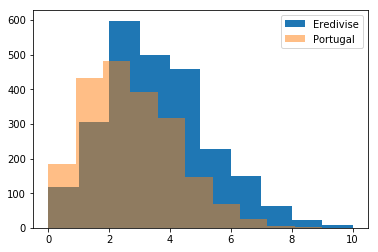

In [14]:
plt.hist(ned_goals, label='Eredivise');
plt.hist(prt_goals, label='Portugal', alpha=0.5);
plt.legend();

In [15]:
def Cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

In [16]:
#comparison NED vs SUI
t, p = stats.ttest_ind(ned_goals, sui_goals, equal_var=False)
p/2, Cohen_d(ned_goals, sui_goals)
#Null hypothesis rejected

(0.004327737916030082, 0.08731019106638802)

In [17]:
#comparison NED vs BEL
t, p = stats.ttest_ind(ned_goals, bel_goals, equal_var=False)
p/2, Cohen_d(ned_goals, bel_goals)
#Null hypothesis rejected

(1.0012208734123801e-07, 0.16258133202574165)

In [18]:
#comparison NED vs POL
t, p = stats.ttest_ind(ned_goals, pol_goals, equal_var=False)
p/2, Cohen_d(ned_goals, pol_goals)
#Null hypothesis rejected

(2.9105636507811226e-39, 0.396251804624763)

In [19]:
#comparison NED vs PRT
t, p = stats.ttest_ind(ned_goals, prt_goals, equal_var=False)
p/2, Cohen_d(ned_goals, prt_goals)
#Null hypothesis rejected

(2.680079900139088e-27, 0.32249090344988524)

In [20]:
#comparison NED vs SCT
t, p = stats.ttest_ind(ned_goals, sct_goals, equal_var=False)
p/2, Cohen_d(ned_goals, sct_goals)
#Null hypothesis rejected

(7.09162432337077e-18, 0.2630352682762722)

In [ ]:
#p-value for comparison statistically significant for all comparison, Dutch league score more goals on average per match

# hypothesis testing for scoreless matches in different leagues

In [22]:
#combine match data with league name
c.execute('''
            SELECT 
                   m.id,
                   l.name as league,
                   l.id as league_id,
                   m.season,
                   m.stage,
                   m.date,
                   m.match_api_id,
                   m.home_team_api_id,
                   m.away_team_api_id,
                   m.home_team_goal,
                   m.away_team_goal
            FROM Match m
            LEFT JOIN League l ON (m.league_id = l.id)
                                   
            ;''')

match_league = pd.DataFrame(c.fetchall())
match_league.columns = [i[0] for i in c.description]

In [23]:
#calculate total match goals
match_league['total_goals'] = match_league['home_team_goal'] + match_league['away_team_goal']

#drop belgium league season 2013/2014 due to lack of information
match_league= match_league.loc[~((match_league['league'] == 'Belgium Jupiler League') & 
                     (match_league['season']=='2013/2014'))]

#retrieve match data for leagues in question
match_league= match_league.query('league_id == 1 | league_id == 13274 | league_id == 15722 \
                                  | league_id == 17642 | league_id == 19694 | league_id == 24558')

In [24]:
#create categorical variable for scoreless matches
match_league['scoreless'] = match_league['total_goals'].apply(lambda x: 1 if x==0 else 0)

In [25]:
#aggregate match stats based on league, season and scoreless matches
match_scoreless_season = match_league.groupby(['league', 'season']).describe()['scoreless']

match_scoreless = match_league.groupby(['league', 'season', 'stage']).describe()['scoreless']

match_scoreless_season = match_scoreless_season[['count', 'mean']]

match_scoreless_season['matches_scoreless'] = match_scoreless_season['count']*match_scoreless_season['mean']

match_scoreless_season['pct_scoreless'] = match_scoreless_season['matches_scoreless']/match_scoreless_season['count']*100

In [26]:
match_scoreless_league = match_league.groupby(['league']).describe()['scoreless']

match_scoreless_league = match_scoreless_league[['count', 'mean']]
match_scoreless_league['matches_scoreless'] = match_scoreless_league['count']*match_scoreless_league['mean']
match_scoreless_league['pct_scoreless'] = match_scoreless_league['matches_scoreless']/match_scoreless_league['count']*100

In [27]:
test_df = match_scoreless[['count','mean']]

match_scoreless.index.get_level_values('league')

Index(['Belgium Jupiler League', 'Belgium Jupiler League',
       'Belgium Jupiler League', 'Belgium Jupiler League',
       'Belgium Jupiler League', 'Belgium Jupiler League',
       'Belgium Jupiler League', 'Belgium Jupiler League',
       'Belgium Jupiler League', 'Belgium Jupiler League',
       ...
       'Switzerland Super League', 'Switzerland Super League',
       'Switzerland Super League', 'Switzerland Super League',
       'Switzerland Super League', 'Switzerland Super League',
       'Switzerland Super League', 'Switzerland Super League',
       'Switzerland Super League', 'Switzerland Super League'],
      dtype='object', name='league', length=1566)

In [28]:
#function for retrieving league data as an array
def get_league_data(match_df, league_name):
    league_df = match_df.loc[match_df.index.get_level_values('league')==league_name][['count','mean']]
    league_df['num'] = league_df['count']*league_df['mean']
    league_array = np.array(league_df['mean'])
    
    return league_array*100

In [29]:
#separate data into series by league
bel_scoreless = get_league_data(match_scoreless, 'Belgium Jupiler League')
ned_scoreless = get_league_data(match_scoreless, 'Netherlands Eredivisie')
pol_scoreless = get_league_data(match_scoreless, 'Poland Ekstraklasa')
prt_scoreless = get_league_data(match_scoreless, 'Portugal Liga ZON Sagres')
sct_scoreless = get_league_data(match_scoreless, 'Scotland Premier League')
sui_scoreless = get_league_data(match_scoreless, 'Scotland Premier League')

In [30]:
#null hypothesis - there is no statistical difference in the percentage of scoreless matches between the Dutch league and other leagues
#alternative hypothesis - there is statistical difference in the Dutch league and the other leagues with Dutch league having
#lower percentage of scoreless matches

#result - rejected null hypothesis

In [31]:
#NED vs. BEL
t,p = stats.ttest_ind(ned_scoreless, bel_scoreless, equal_var=False)
p/2, abs(Cohen_d(ned_scoreless, bel_scoreless))

(0.011293981412264013, 0.216168397232261)

In [32]:
#NED vs. SUI
t, p = stats.ttest_ind(ned_scoreless, sui_scoreless, equal_var=False)
p/2, abs(Cohen_d(ned_scoreless, sui_scoreless))

(0.0001461004274129247, 0.29746883081130093)

In [33]:
t, p = stats.ttest_ind(ned_scoreless, pol_scoreless, equal_var=False)
p/2, abs(Cohen_d(ned_scoreless, pol_scoreless))

(5.483984281754976e-08, 0.49162332667166597)

In [34]:
t, p = stats.ttest_ind(ned_scoreless, prt_scoreless, equal_var=False)
p/2, abs(Cohen_d(ned_scoreless, prt_scoreless))

(6.563818530760138e-08, 0.47973797139417246)

In [35]:
t, p = stats.ttest_ind(ned_scoreless, sct_scoreless, equal_var=False)
p/2, abs(Cohen_d(ned_scoreless, sct_scoreless))

(0.0001461004274129247, 0.29746883081130093)

# Hypothesis test for Avg players rating per match in league
### (FYI, I have done some manual work getting every players overall rating & potential with lots of cells
### Not putting those works here in the notebook instead I created csv file after joining those dataset)

In [38]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import sqlite3
import numpy as np
from numpy import random
from functools import reduce

In [39]:
# Created two different csv files with every players rating and players potential per match in league
rating_df = pd.read_csv('avg_player_rating.csv')
potential_df = pd.read_csv('avg_player_potential.csv')

In [40]:
# Dividing the leagues
ned_league_rating = rating_df.loc[rating_df['league']== 'Netherlands Eredivisie']
port_league_rating = rating_df.loc[rating_df['league']== 'Portugal Liga ZON Sagres']
bel_league_rating = rating_df.loc[rating_df['league']== 'Belgium Jupiler League']
pol_league_rating = rating_df.loc[rating_df['league']== 'Poland Ekstraklasa']
scot_league_rating = rating_df.loc[rating_df['league']== 'Scotland Premier League']
switz_league_rating = rating_df.loc[rating_df['league']== 'Switzerland Super League']

In [41]:
# looking at avg_player_rating in each league
ned_league_rating_df = ned_league_rating['avg_player_rating']
port_league_rating_df = port_league_rating['avg_player_rating']
bel_league_rating_df = bel_league_rating['avg_player_rating']
pol_league_rating_df  = pol_league_rating['avg_player_rating']
scot_league_rating_df = scot_league_rating['avg_player_rating']
switz_league_rating_df = switz_league_rating['avg_player_rating']

In [42]:
print("NED vs PORT")
print(stats.ttest_ind(ned_league_rating_df, port_league_rating_df, equal_var=False))
print("NED vs BEL")
print(stats.ttest_ind(ned_league_rating_df, bel_league_rating_df, equal_var=False))
# print(F"effect size:",Cohen_d(ned_league_rating_df, bel_league_rating_df))
print("NED vs POL")
print(stats.ttest_ind(ned_league_rating_df, pol_league_rating_df, equal_var=False))
# print(F"effect size:",Cohen_d(ned_league_rating_df, pol_league_rating_df))
print("NED vs Scot")
print(stats.ttest_ind(ned_league_rating_df, scot_league_rating_df, equal_var=False))
# print(F"effect size:",Cohen_d(ned_league_rating_df, scot_league_rating_df))
print("NED vs Switz")
print(stats.ttest_ind(ned_league_rating_df, switz_league_rating_df, equal_var=False))
# print(F"effect size:",Cohen_d(ned_league_rating_df, switz_league_rating_df))

NED vs PORT
Ttest_indResult(statistic=-0.46880757273489804, pvalue=0.6392380237116921)
NED vs BEL
Ttest_indResult(statistic=22.654643209170786, pvalue=7.44240341320733e-105)
NED vs POL
Ttest_indResult(statistic=61.94693715340812, pvalue=0.0)
NED vs Scot
Ttest_indResult(statistic=51.42317347956111, pvalue=0.0)
NED vs Switz
Ttest_indResult(statistic=50.719717374347844, pvalue=0.0)


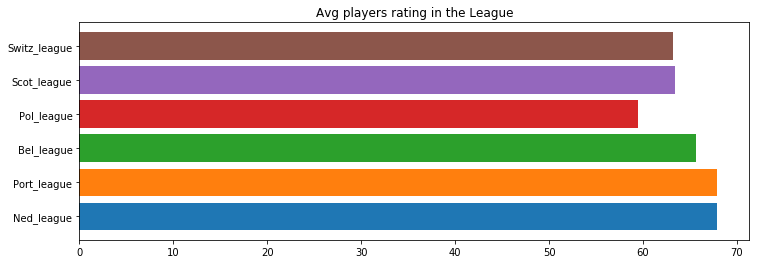

In [43]:
fig, ax = plt.subplots(figsize=(12, 4))
plt.barh("Ned_league" , ned_league_rating_df.mean(), label='netherand')
plt.barh("Port_league", port_league_rating_df.mean(), label='portugal')
plt.barh("Bel_league" , bel_league_rating_df.mean(), label='belgium')
plt.barh("Pol_league" , pol_league_rating_df.mean(), label='poland')
plt.barh("Scot_league" , scot_league_rating_df.mean(), label='scotland')
plt.barh("Switz_league" , switz_league_rating_df.mean(), label='swtizland')
ax.set_title("Avg players rating in the League")

plt.show()

In [44]:
print(f"AVG players rating in Ned_league:",ned_league_rating_df.mean())
print(f"AVG players rating in Port_league:",port_league_rating_df.mean())
print(f"AVG players rating in Bel_league:",bel_league_rating_df.mean())
print(f"AVG players rating in Pol_league:",pol_league_rating_df.mean())
print(f"AVG players rating in Scot_league:",scot_league_rating_df.mean())
print(f"AVG players rating in Switz_league:",switz_league_rating_df.mean())

AVG players rating in Ned_league: 67.85464608911256
AVG players rating in Port_league: 67.90376154359285
AVG players rating in Bel_league: 65.69183660616169
AVG players rating in Pol_league: 59.51608087443279
AVG players rating in Scot_league: 63.43803624053617
AVG players rating in Switz_league: 63.2336793083073


# Players avgerage potential in each league


In [45]:
ned_league_potential = potential_df.loc[potential_df['league']== 'Netherlands Eredivisie']
port_league_potential = potential_df.loc[potential_df['league']== 'Portugal Liga ZON Sagres']
bel_league_P_potential = potential_df.loc[potential_df['league']== 'Belgium Jupiler League']
pol_league_P_potential = potential_df.loc[potential_df['league']== 'Poland Ekstraklasa']
scot_league_P_potential = potential_df.loc[potential_df['league']== 'Scotland Premier League']
switz_league_P_potential = potential_df.loc[potential_df['league']== 'Switzerland Super League']

In [46]:
ned_league_potential_df = ned_league_potential['avg_players_potential']
port_league_potential_df = port_league_potential['avg_players_potential']
bel_league_P_potential_df = bel_league_P_potential['avg_players_potential']
pol_league_P_potential_df  = pol_league_P_potential['avg_players_potential']
scot_league_P_potential_df = scot_league_P_potential['avg_players_potential']
switz_league_P_potential_df = switz_league_P_potential['avg_players_potential']

In [47]:
print("NED vs BEL")
print(stats.ttest_ind(ned_league_potential_df, bel_league_P_potential_df, equal_var=False))
print(f"effect size: {Cohen_d(ned_league_potential_df, bel_league_P_potential_df)}")
print("NED vs POL")
print(stats.ttest_ind(ned_league_potential_df, pol_league_P_potential_df, equal_var=False))
print(f"effect size: {Cohen_d(ned_league_potential_df, pol_league_P_potential_df)}")
print("NED vs Scot")
print(stats.ttest_ind(ned_league_potential_df, scot_league_P_potential_df, equal_var=False))
print(f"effect size: {Cohen_d(ned_league_potential_df, scot_league_P_potential_df)}")
print("NED vs Switz")
print(stats.ttest_ind(ned_league_potential_df, switz_league_P_potential_df, equal_var=False))
print(f"effect size: {Cohen_d(ned_league_potential_df, switz_league_P_potential_df)}")

NED vs BEL
Ttest_indResult(statistic=28.24840284186084, pvalue=4.4335620380137e-155)
effect size: 0.970966565478423
NED vs POL
Ttest_indResult(statistic=60.031883730786305, pvalue=0.0)
effect size: 2.7579779094016406
NED vs Scot
Ttest_indResult(statistic=52.800734203136734, pvalue=0.0)
effect size: 1.647023730961226
NED vs Switz
Ttest_indResult(statistic=40.6784228188515, pvalue=1.0660381590878225e-287)
effect size: 1.379983206207138


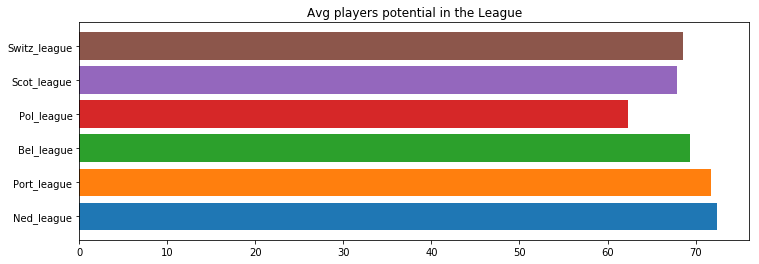

In [48]:
fig, ax = plt.subplots(figsize=(12, 4))
plt.barh("Ned_league" , ned_league_potential_df.mean(), label='netherand')
plt.barh("Port_league", port_league_potential_df.mean(), label='portugal')
plt.barh("Bel_league" , bel_league_P_potential_df.mean(), label='belgium')
plt.barh("Pol_league" , pol_league_P_potential_df.mean(), label='poland')
plt.barh("Scot_league" , scot_league_P_potential_df.mean(), label='scotland')
plt.barh("Switz_league" , switz_league_P_potential_df.mean(), label='swtizland')
ax.set_title("Avg players potential in the League")
# ax.legend(['netherand', 'portugal'])
plt.show()

In [50]:
print("ned_potential:",ned_league_potential_df.mean())
print("port_potential:",port_league_potential_df.mean())
print("bel_potential:",bel_league_P_potential_df.mean())
print("pol_potential:",pol_league_P_potential_df.mean())
print("scot_potential:",scot_league_P_potential_df.mean())
print("switz_potential:",switz_league_P_potential_df.mean())

ned_potential: 72.45938103527938
port_potential: 71.73388100123572
bel_potential: 69.38321738360528
pol_potential: 62.362527424933155
scot_potential: 67.8478014842775
switz_potential: 68.54370554131137
